<a href="https://colab.research.google.com/github/Sirri69/Electricity-Usage-Predicition/blob/master/ELECTRICITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# pip install modin[ray]
# import modin.pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!mkdir ~/.kaggle/

In [ ]:
!ls -l

total 8
-rw-r--r-- 1 root root   66 Oct 13 15:47 kaggle.json
drwxr-xr-x 1 root root 4096 Oct  5 16:31 sample_data


In [ ]:
!mv kaggle.json ~/.kaggle/  

In [ ]:
!kaggle datasets download -d jeanmidev/smart-meters-in-london

100% 2.25G/2.26G [00:49<00:00, 48.6MB/s]
100% 2.26G/2.26G [00:49<00:00, 49.0MB/s]


In [ ]:
!unzip -q smart-meters-in-london.zip

In [ ]:
#Loading ACORN data

ac = pd.read_csv('acorn_details.csv', engine='python')

ac.head(10)

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
5,POPULATION,Age,Age 50-64,124.0,121.0,120.0,72.0,82.0,126.0,109.0,107.0,112.0,90.0,41.0,95.0,96.0,103.0,89.0,78.0,89.0
6,POPULATION,Age,Aged 65-74,125.0,120.0,152.0,55.0,61.0,144.0,108.0,104.0,182.0,72.0,29.0,91.0,93.0,125.0,73.0,59.0,76.0
7,POPULATION,Age,Aged 75 plus,112.0,103.0,157.0,49.0,57.0,117.0,98.0,96.0,220.0,66.0,32.0,87.0,96.0,152.0,72.0,56.0,76.0
8,POPULATION,Geography,England,107.0,101.0,103.0,114.0,106.0,75.0,107.0,106.0,102.0,106.0,95.0,93.0,97.0,89.0,97.0,110.0,97.0
9,POPULATION,Geography,Northern Ireland,30.0,95.0,45.0,2.0,49.0,462.0,53.0,104.0,30.0,91.0,56.0,87.0,131.0,67.0,95.0,75.0,43.0


In [ ]:
df = pd.read_csv('informations_households.csv')

In [ ]:
df.head(5)

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [ ]:
len(df['Acorn_grouped'].value_counts())

5

In [ ]:
df2 = pd.read_csv('daily_dataset.csv/daily_dataset.csv')

In [ ]:
df2

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066
...,...,...,...,...,...,...,...,...,...
3510428,MAC004977,2014-02-24,0.0950,0.118458,0.580,48,0.093814,5.686,0.052
3510429,MAC004977,2014-02-25,0.0675,0.084208,0.176,48,0.037107,4.042,0.046
3510430,MAC004977,2014-02-26,0.1080,0.120500,0.282,48,0.069332,5.784,0.046
3510431,MAC004977,2014-02-27,0.0720,0.114062,0.431,48,0.094482,5.475,0.047


In [ ]:
df2 = df2[['LCLid','day','energy_sum']]

In [ ]:
#Final data from electricity dataset
df2.head()

,LCLid,day,energy_sum
0,MAC000131,2011-12-15,9.505
1,MAC000131,2011-12-16,14.216
2,MAC000131,2011-12-17,9.111
3,MAC000131,2011-12-18,10.511
4,MAC000131,2011-12-19,15.647


In [ ]:
#LET'S LOAD AND ADD THE WEATHER DATA

df3 = pd.read_csv('weather_daily_darksky.csv')
df3.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00,5.52,10.33,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,rain,11.89,0.87,2011-12-02 12:00:00,3.26,5.33,1.0,2011-12-02 00:00:00,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,rain,13.16,0.80,2011-12-24 15:00:00,4.37,5.32,1.0,2011-12-24 00:00:00,2011-12-24 15:55:55,7.45,3.17,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [ ]:
#Converting the data to date time object for easier processing
df3['day']=  pd.to_datetime(df3['time']) # day is given as timestamp
df3['day']=  pd.to_datetime(df3['day'],format='%Y%m%d').dt.date

In the block below we have taken the variables that may show some relation with Daily energy usage of an individual. 


In [ ]:
df3 = df3[['temperatureMax', 'cloudCover', 'windSpeed', 'pressure', 'humidity','uvIndex', 'temperatureMin','day']]
df3['AvgTemp'] = (df3['temperatureMax']+df3['temperatureMin'])/2
df3.drop(['temperatureMax','temperatureMin'],axis=1,inplace=True)

In [ ]:
# Final Weather data
df3.head()

,cloudCover,windSpeed,pressure,humidity,uvIndex,day,AvgTemp
0,0.79,3.88,1016.08,0.95,1.0,2011-11-11,10.405
1,0.56,3.94,1007.71,0.88,1.0,2011-12-11,5.535
2,0.85,3.54,1032.76,0.74,0.0,2011-12-27,9.180
3,0.32,3.00,1012.12,0.87,1.0,2011-12-02,5.315
4,0.37,4.46,1028.17,0.80,1.0,2011-12-24,5.695


In [ ]:
df2['day'] = pd.to_datetime(df2['day'],format='%Y-%m-%d').dt.date

In [ ]:
# Merging the both datasets according to the date of the data was collected.
weather_energy =  df3.merge(df2, on='day')

In [ ]:
weather_energy.head()

,cloudCover,windSpeed,pressure,humidity,uvIndex,day,AvgTemp,LCLid,energy_sum
0,0.56,3.94,1007.71,0.88,1.0,2011-12-11,5.535,MAC000221,17.166
1,0.56,3.94,1007.71,0.88,1.0,2011-12-11,5.535,MAC000228,7.058
2,0.56,3.94,1007.71,0.88,1.0,2011-12-11,5.535,MAC000234,15.721
3,0.56,3.94,1007.71,0.88,1.0,2011-12-11,5.535,MAC000235,23.192
4,0.56,3.94,1007.71,0.88,1.0,2011-12-11,5.535,MAC000046,24.725


In [ ]:
df.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [ ]:
#Changing the missing data with most occuring data
df['Acorn_grouped'].replace('ACORN-','Affluent',inplace=True)

In [ ]:
df['Acorn_grouped'].value_counts()

Affluent       2194
Adversity      1816
Comfortable    1507
ACORN-U          49
Name: Acorn_grouped, dtype: int64

In [ ]:
#Removing NaN values
d = weather_energy.dropna()

In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Getting data in 0-1 range for the neural network
e = MinMaxScaler()
d[['cloudCover','windSpeed','pressure','humidity'	,'uvIndex','AvgTemp']] = e.fit_transform(d[['cloudCover','windSpeed','pressure','humidity'	,'uvIndex','AvgTemp']])

In [ ]:
d

,cloudCover,windSpeed,pressure,humidity,uvIndex,day,AvgTemp,LCLid,energy_sum
0,0.56,0.383197,0.461489,0.818182,0.142857,2011-12-11,0.273147,MAC000221,17.166
1,0.56,0.383197,0.461489,0.818182,0.142857,2011-12-11,0.273147,MAC000228,7.058
2,0.56,0.383197,0.461489,0.818182,0.142857,2011-12-11,0.273147,MAC000234,15.721
3,0.56,0.383197,0.461489,0.818182,0.142857,2011-12-11,0.273147,MAC000235,23.192
4,0.56,0.383197,0.461489,0.818182,0.142857,2011-12-11,0.273147,MAC000046,24.725
...,...,...,...,...,...,...,...,...,...
3506313,0.35,1.000000,0.152100,0.472727,0.142857,2014-02-15,0.350952,MAC004926,5.514
3506314,0.35,1.000000,0.152100,0.472727,0.142857,2014-02-15,0.350952,MAC004932,14.368
3506315,0.35,1.000000,0.152100,0.472727,0.142857,2014-02-15,0.350952,MAC004937,6.946
3506316,0.35,1.000000,0.152100,0.472727,0.142857,2014-02-15,0.350952,MAC004965,21.582


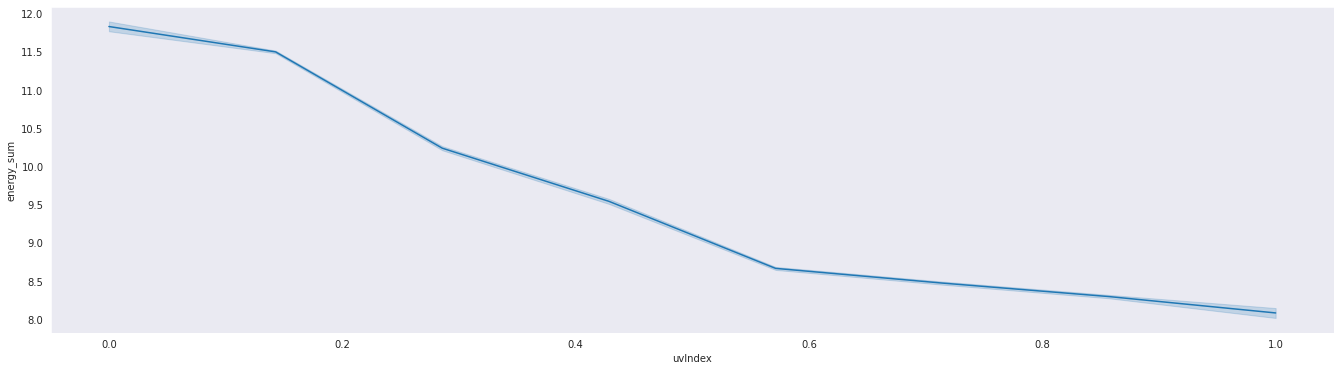

In [ ]:
plt.figure(figsize=(23,6))
sns.lineplot(x=d['uvIndex'], y=d['energy_sum'])

We can see in the above graph that as UV Index increases, energy usage decreases. This shows a very important property about the data, that is the fact that :- **People tend to spend more electricity on heating than on cooling.** We reach that conclusion as we know that Temprature and UV Index are directly proportional.


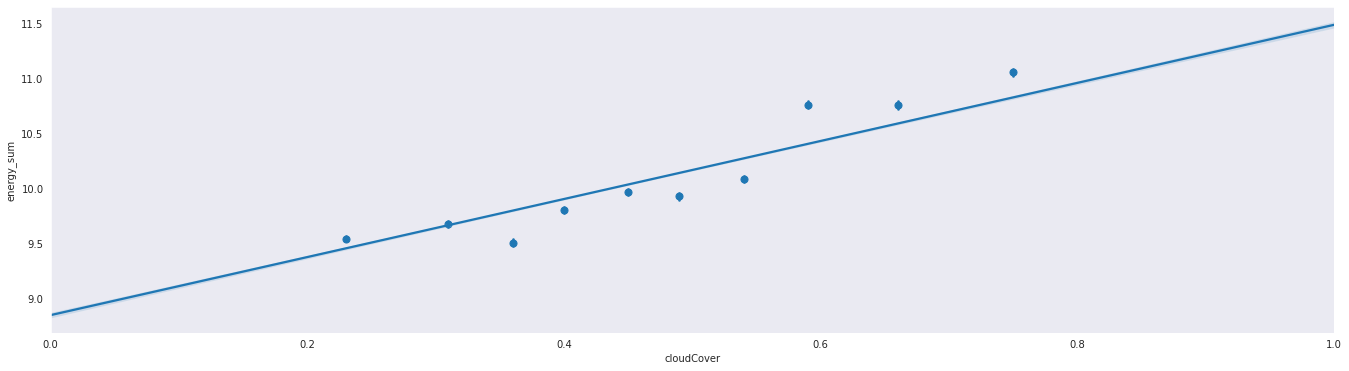

In [ ]:
plt.figure(figsize=(23,6))
sns.regplot(x=d['cloudCover'], y=d['energy_sum'], x_estimator=np.mean, x_bins=10)

As we can see that cloud cover and energy usage are somewhat related, they increase together. And it makes sense, as studies like [these](https://dspace.library.uu.nl/bitstream/handle/1874/350901/Paper%20Relative%20Humidity.pdf?sequence=2#:~:text=One%20can%20imagine%20that%20a,water%20vapour%20in%20the%20air.&text=When%20the%20relative%20humidty%20reaches,saturated%20and%20clouds%20will%20form.) show that humidity and cloud cover are correlated and are directly proportional. And we know that high humidity causes :-

*   Sweating
*   Altering the rate and depth of blood circulation
*   Increased respiration

So, people use more fans, air conditioners etc to escape the feeling of discomfort. Now this is a valuable observation because in the above mentioned study it is shown that Cloud Cover and Humidty are directly proportional irrespective of the month, which means it is also directy proportional irrespectie of weather and climate. S, our final observaion is:- **People tend to use more electricity during higher humidity and higher cloud cover irrespective of the mean temprature of the month of the year.** This is a more valuable observation as this tells us about not only one but 2 variables , Cloud Cover and Humidity.

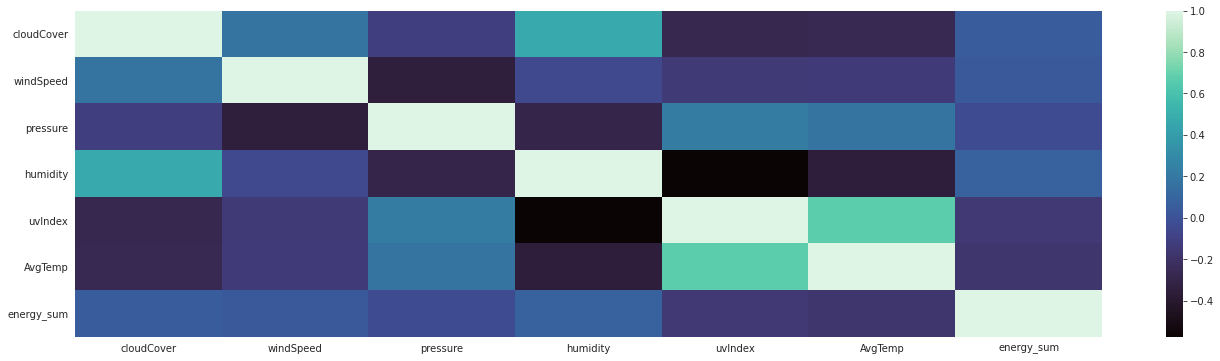

In [ ]:
import seaborn as sns

plt.figure(figsize=(23,6))
sns.heatmap(d.corr(), cmap='mako')

The above heatplot shows correlation (calculated using Pearson's R), of every variable with other variables. We know higher the absolute value of correlation from Pearson's R, higher the correlation. For further explation, if absolute value is near 0, then those variables have a lower correlation. If correlation < 0 then it means if one variable increases, then other decreases, if correlation > 0 then it means when one variable increases, other does too.
</br>
</br>
For a visual explanation, have a look at the image below, where 	ρ is the value of correlation. 

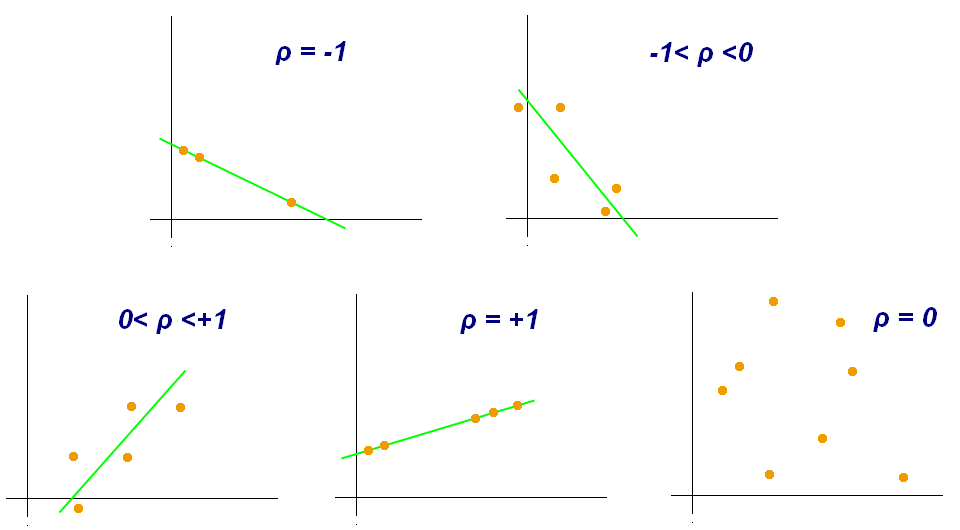

In [ ]:
h_df = df[:int(len(df)/3)] #Using 1/3rd of the total dataset, which is sufficient for the model

In [ ]:
# Preparing data for LSTM layers

j = [] # X data. Dynamic Variables.
stat_var = [] # Static Variable 
y = [] # Data to be predicted

c=0
for i in h_df['LCLid']:
  c = c+1
  if c % 50 == 0:
    print(c)
  k = d[d['LCLid'] == i].sort_values('day').drop(['day','LCLid'],axis=1) # Sorting data according to dates, so that everything remains sequential.
  # print(k.head(10))
  h = k.to_numpy() # Converting data to NumPy Arrays to feed it into the Neural Net
  for n in range(len(k)-5): # Using data of 5 days prior to the date of prediction  
    j.append(h[0+n:5+n])
    y.append(h[5+n][-1])
    stat_var.append(h_df[h_df['LCLid']==i]['Acorn_grouped'].iloc[0])

In [ ]:
#Converting numerical to categorical

for i in range(len(stat_var)):
  if stat_var[i] == 'Affluent':
    stat_var[i] = [1,0,0,0]
  elif stat_var[i] == 'Adversity':
    stat_var[i] = [0,1,0,0]
  elif stat_var[i] == 'Comfortable':
    stat_var[i] = [0,0,1,0]
  else:
    stat_var[i] = [0,0,0,1]



#ACORN VALUES :-

# Affluent       
# Adversity     
# Comfortable    
# ACORN-U          

In [ ]:
#Using MinMaxScaler to scale values to a common range of 0-1

e2 = MinMaxScaler()
y = e2.fit_transform(np.array(y).reshape(-1,1))

In [ ]:
# Assigning 75% of total data for training
X_train, stat_var_train, Y_train = np.array(j[:int(len(j)*0.75)]), np.array(stat_var[:int(len(j)*0.75)]), np.array(y[:int(len(j)*0.75)])

In [ ]:
# Importing Keras to make the Model
import keras

In [ ]:
I1 = keras.layers.Input(shape=(5,7))
I2 = keras.layers.Input(shape=(10,)) # Income, Age, Education, Gender, House_Size
l1 = keras.layers.LSTM(300, return_sequences=True)(I1)
l2 = keras.layers.LSTM(250, return_sequences=True)(l1)
l3 = keras.layers.LSTM(200, return_sequences=True)(l2)
l4 = keras.layers.LSTM(150)(l3)
cocat = keras.layers.concatenate([l4,I2])
d1 = keras.layers.Dense(250, kernel_regularizer=keras.regularizers.l2(0.0001))(cocat)
dr = keras.layers.Dropout(0.3)(d1)
d2 = keras.layers.Dense(200)(dr)
d3 = keras.layers.Dense(150, kernel_regularizer=keras.regularizers.l1(0.0001))(d2)
dr = keras.layers.Dropout(0.2)(d3)
d4 = keras.layers.Dense(100)(dr)
d5 = keras.layers.Dense(70)(d4)
O = keras.layers.Dense(1)(d5)
 
model = keras.Model([I1,I2],O)

In [ ]:
model.summary()

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 5, 7)]       0                                            
__________________________________________________________________________________________________
lstm_19 (LSTM)                  (None, 5, 300)       369600      input_19[0][0]                   
__________________________________________________________________________________________________
lstm_20 (LSTM)                  (None, 5, 250)       551000      lstm_19[0][0]                    
__________________________________________________________________________________________________
lstm_21 (LSTM)                  (None, 5, 200)       360800      lstm_20[0][0]                    
______________________________________________________________________________________

In [ ]:
from keras.utils import plot_model

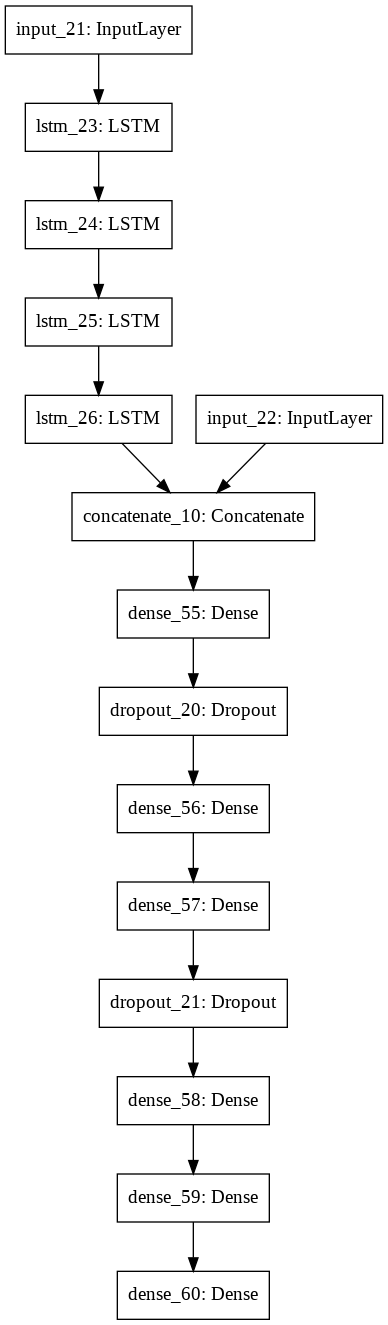

In [ ]:
plot_model(model)

Here, we use two Input layers instead of just one. First input layer is responsible for taking in the dynamic variables and then process them through LSTM layers to learn the time series of sequential dependencies in the data. The second layer is responsible for dealing with the static variables, variables which do not change with time. And then the output of the LSTM layers block and the input from second input layer is passed into a concatenation layer. Keras provides this layer to concatenate the outputs of two layers. Then the concatenated data is passed into a block of dense layers for further generalization and learning. <br>
<br>
It'll be safe to say this model architecture is some kind of variant of Wide and Deep architecture. It is considered a variant as the wide part of the architecture isn't connected to the last dense layer but connected to the first dense layer, that is done to ensure the generalization of data.

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(0.00008),loss=keras.losses.mae,metrics=[keras.metrics.mse, keras.metrics.mape])

In the below block, we use a Learning Rate Scheduler to keep learning rate changing during the course of training. This is done as it has been seen that decreasing the learning rate gradually leads to faster convergence.

In [ ]:
def scheduler(epoch, lr):
  if 150 > epoch > 100:
    return 0.00004
  elif 200 > epoch > 150:
    return 0.00002
  elif 250 > epoch > 200:
    return 0.000008
  elif 300 > epoch > 250:
    return 0.000005
  elif 350 > epoch > 300:
    return 0.0000035
  elif 400 > epoch > 350:
    return lr*0.5
  else:
    return 0.00008

In [ ]:
history = model.fit((X_train,stat_var_train),Y_train,batch_size=30000,epochs=400,validation_split=0.33,callbacks=[keras.callbacks.ModelCheckpoint('model.hdf5',verbose=1, monitor='val_loss', save_best_only=True), keras.callbacks.LearningRateScheduler(scheduler,verbose=1)])

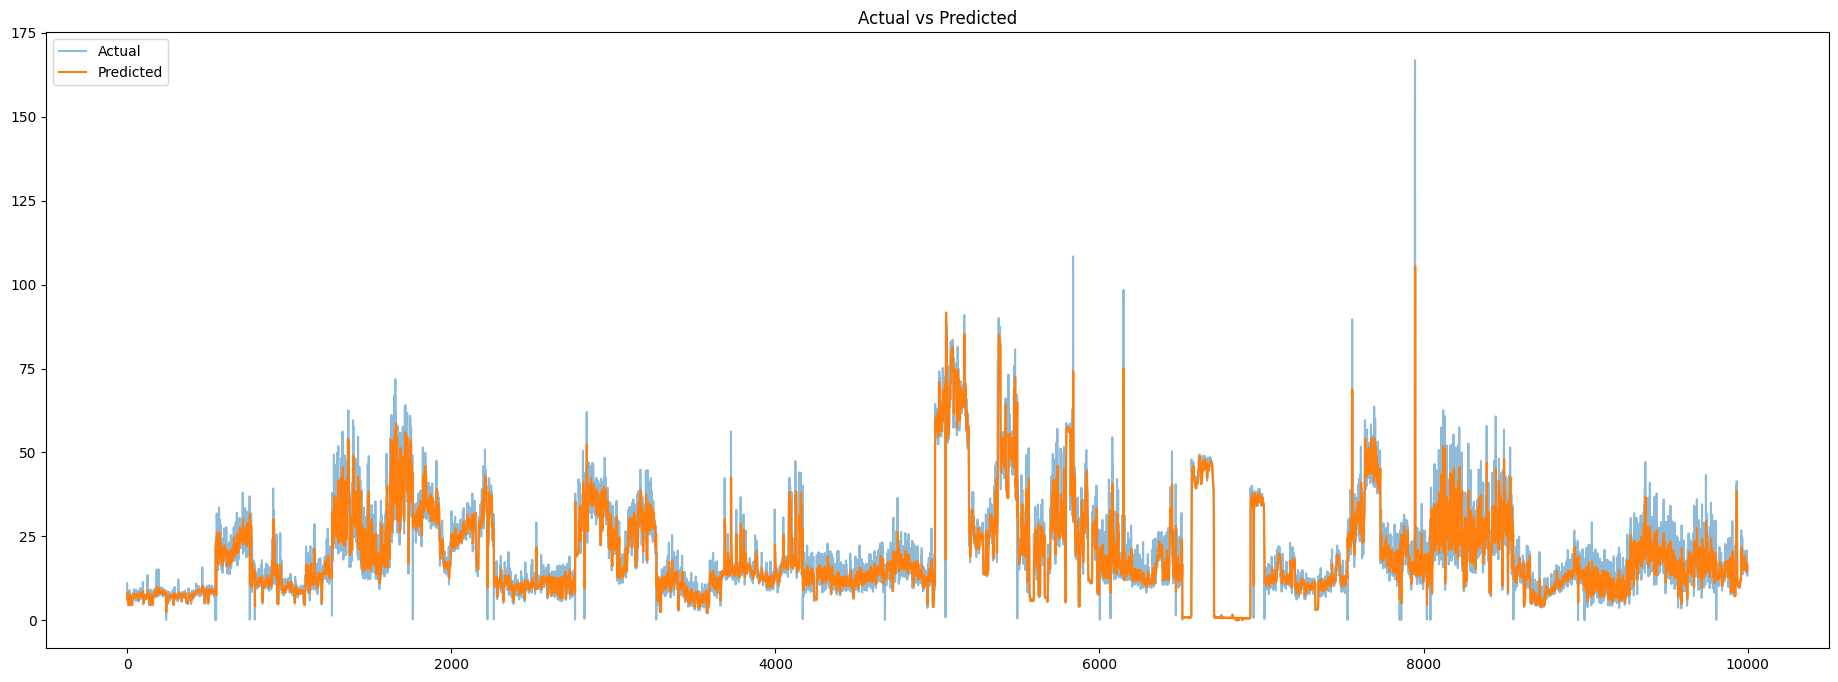

In [ ]:
import matplotlib.pyplot as plt

# plt.title('Actual vs Predicted')
# plt.style.use('dark_background')
# sns.set_style('')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(23,8))
plt.title('Actual vs Predicted')
plt.plot(e2.inverse_transform(Y_train[:10000]),label='Actual',alpha = 0.5)
plt.plot(e2.inverse_transform(model.predict((X_train[:10000],stat_var_train[:10000]))), label='Predicted')
plt.legend(loc='upper left')

In [ ]:
#CALCULATING TEST ACCURACY

X_test, stat_var_test, Y_test = np.array(j[int(len(j)*0.75):]), np.array(stat_var[int(len(j)*0.75):]), np.array(y[int(len(j)*0.75):])

In [ ]:
model.evaluate((X_test, stat_var_test), Y_test)
predictions = model.predict((X_test, stat_var_test))

9215/9215 [==============================] - 40s 4ms/step - loss: 0.0067 - mean_squared_error: 1.4087e-04 - mean_absolute_percentage_error: 7566.3921


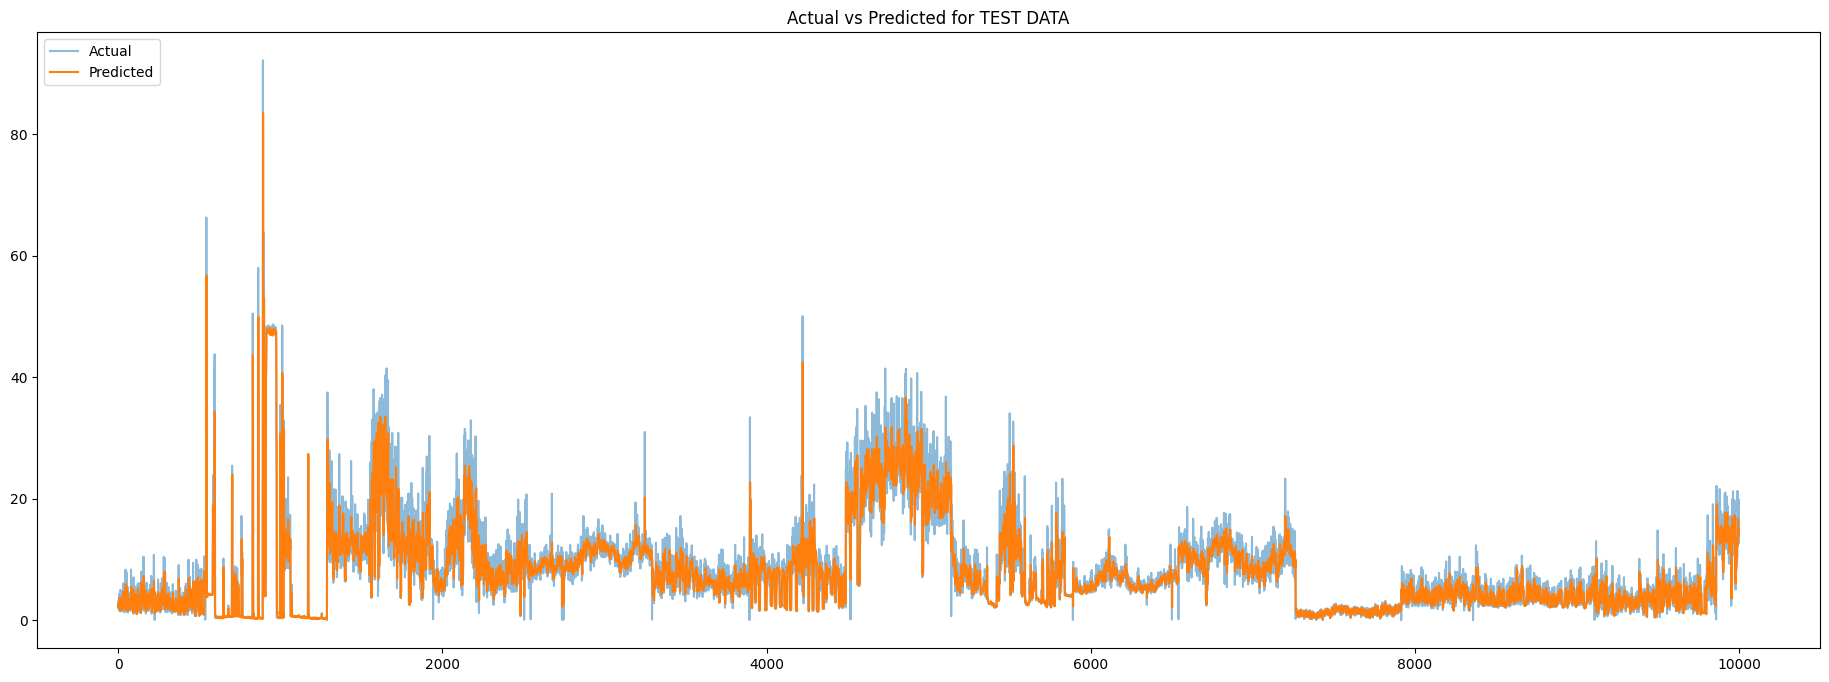

In [ ]:
plt.figure(figsize=(23,8))
plt.title('Actual vs Predicted for TEST DATA')
plt.plot(e2.inverse_transform(Y_test[:10000]),label='Actual',alpha = 0.5)
plt.plot(e2.inverse_transform(model.predict((X_test[:10000],stat_var_test[:10000]))), label='Predicted')
plt.legend(loc='upper left')

Even though we are using only 5 days of prior data to train the model to predict for the next the, results look pretty good. The trends are captured very efficiently, if we increase the strenth of the model and provide more days of prior data, accuracy will indeed increase, as it will start capturing the short term trends better and will understand the intensity of change too.